In this task, I’m going to introduce you to a data science project on online shopping intention analysis with Python. The growing popularity of online shopping has led to the emergence of new economic activities. To be successful in a highly competitive eCommerce environment, it is essential to understand customers’ online purchase intent.

### Introduction to Online Shopping Intention Analysis
In recent years, e-commerce has brought huge benefits to suppliers and consumers. Defined as the use of the Internet to sell products or services to individual consumers, e-commerce has profoundly changed the way people conduct their business.

Also, Read – 100+ Machine Learning Projects Solved and Explained.

Indeed, it has become an important full-fledged transaction channel. A recent survey of online shopping predicted that the total amount of direct sales to customers will exceed $ 240 billion by 2007. Major technological innovations in online shopping have changed transaction channels in the information age.

With the growth of online shopping, it has become important to understand the factors that influence a consumer’s intention to buy from a website rather than just browse. This emerging topic is of interest to both academics and machine learning practitioners.

### Online Shopping Intention Analysis
In this section, I will take you through a Data Science Project on Online Shopping Intention analysis with Machine Learning. I will start with this task by importing the necessary libraries and the data:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Online Shopping Intention Analysis with Machine Learning\online_shoppers_intention.csv')

Now let’s have a look at the missing values and fill them by using the fillna method in Python pandas:

In [2]:
missing = data.isnull().sum()
print(missing)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [3]:
data.fillna(0, inplace = True)

Now have a look at product related bounce rates of customers:

In [4]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

Now let’s apply the K-elbow method to determine the number of clustering groups:

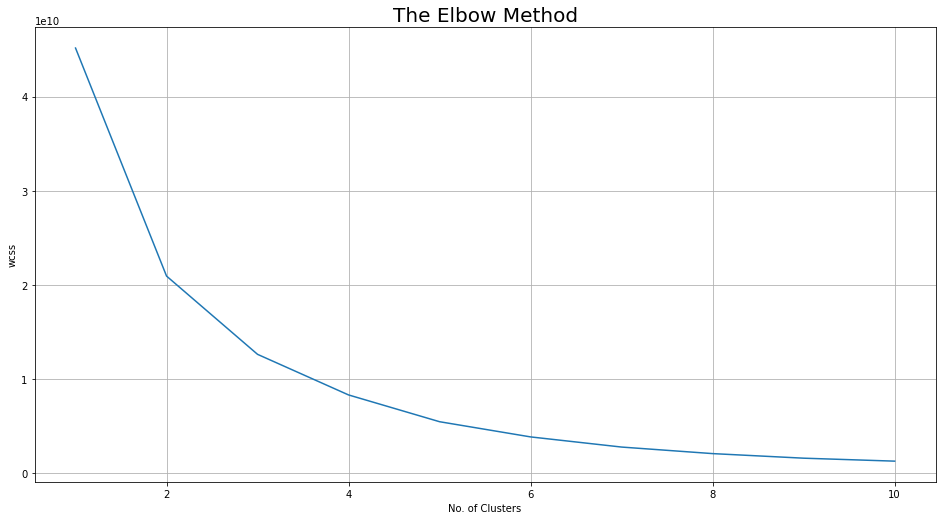

In [5]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### K Means Clustering
According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means method and plot the clusters:

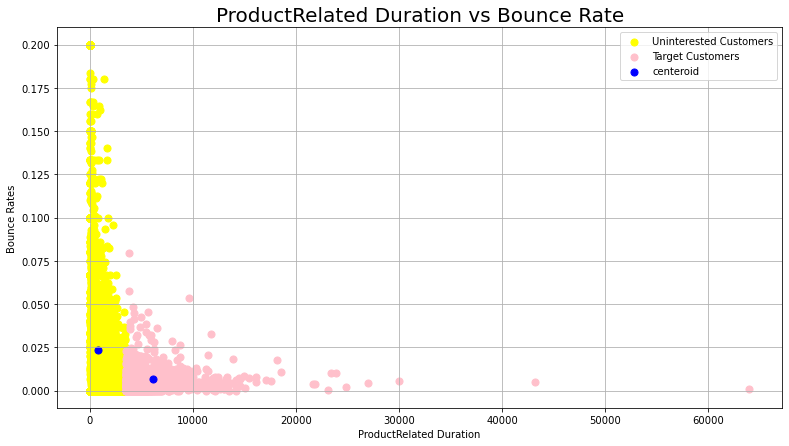

In [6]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers):

Adjusted rand index: 
0.08359442469281096


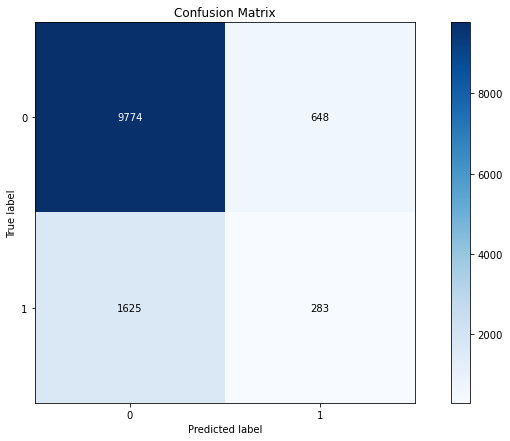

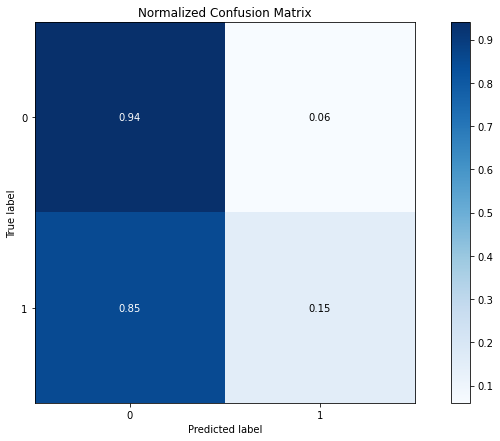

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# get predicted clustering result label
labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

### Observations From Above Plots:
From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.

So it is clear that we have poorly bundled many successful revenue sessions as uninterested customers, which means when the high bounce rate combined with a short product-related page duration, there are still a lot of customers. targets.